In [1]:
import inkml.inkml2img as conv
import subprocess
import os

# from processing import *
# from generate_dataset import *
from clf import get_clf
from PIL import Image

import warnings  #suppress warnings
warnings.simplefilter('ignore')

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

# from prep_HASYv2 import *

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [33]:
from sklearn import datasets, svm, metrics
digits = load_digits()
X = digits.data
y = digits.target

In [38]:
X_ts.shape
X_tr.shape

(60000, 28, 28)

In [4]:
from processing import label_segments

In [26]:
from tensorflow.keras.datasets import mnist
(X_tr,y_tr),(X_ts,y_ts) = mnist.load_data()
# yhat, acc,fitted_clf =  get_clf(X_tr,X_ts,y_tr,y_ts)

In [9]:
import pickle
from datetime import datetime
saved_model_path = "./saved_models/baseline_DecisionTreeClassifier_{}.p".format(datetime.now().strftime("%Y%m%d%s")) # _%H%M%S
# Save entire model to a HDF5 file
# fitted_clf.save(saved_model_path)
pickle.dump(fitted_clf, open(saved_model_path, 'wb'))

### convert INKml to png

good matrix file indices:
82
8


In [3]:
directory = 'INKdata/MatricesTrain2014/'
out_folder= './MatricesTrain_png/'
#convert_inkml(directory,out_folder)
# directory = 'INKdata/trainData_2012_part1/'
# out_folder= './train2012_png/'


In [4]:
#get list of png files
png_files = []
f = os.popen("ls %s" %out_folder)
for i in f.readlines():
    png_files.append(out_folder + i[:-1])
f.close()    
# png_files

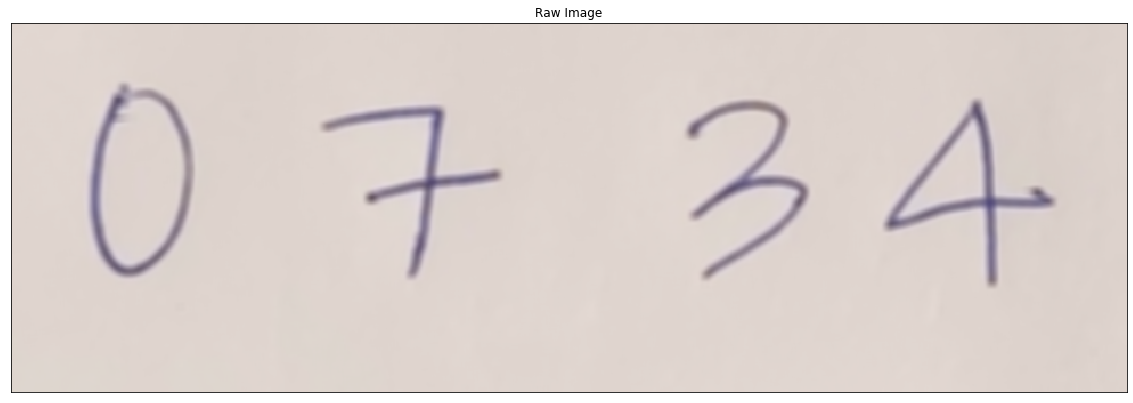

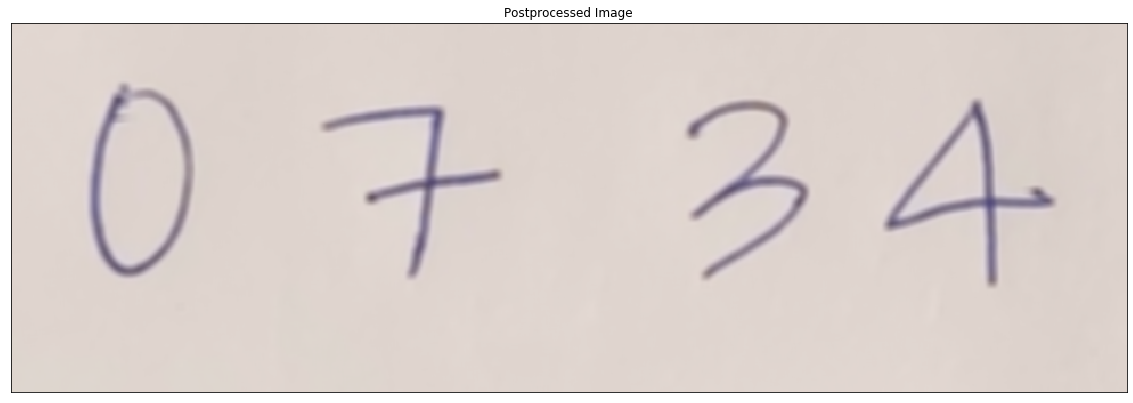

In [11]:
# index = 53
# index = np.random.randint(len(png_files))
# matname = 'images/matrix'+str(index)
# # index=579 for firstsetonly
# filename = png_files[index]
binary_arr,label_arr, segments,orig = label_segments('testset/0734.jpg','')
# print("index: ",index)
plt.rcParams["figure.figsize"] = (20,6)
plt.imshow(orig);

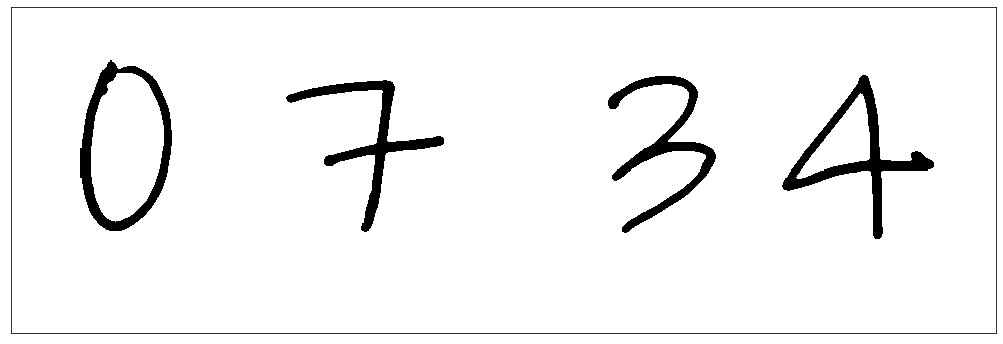

In [25]:
fig,ax = plt.subplots(1)
ax.imshow(1-binary_arr,cmap='gray')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.savefig('postprocessed_binary.jpg')
# plt.imsave('postprocessed_binary.jpg',1-binary_arr)

In [ ]:
for seg in segments:
    

IndexError: index 10 is out of bounds for axis 0 with size 10

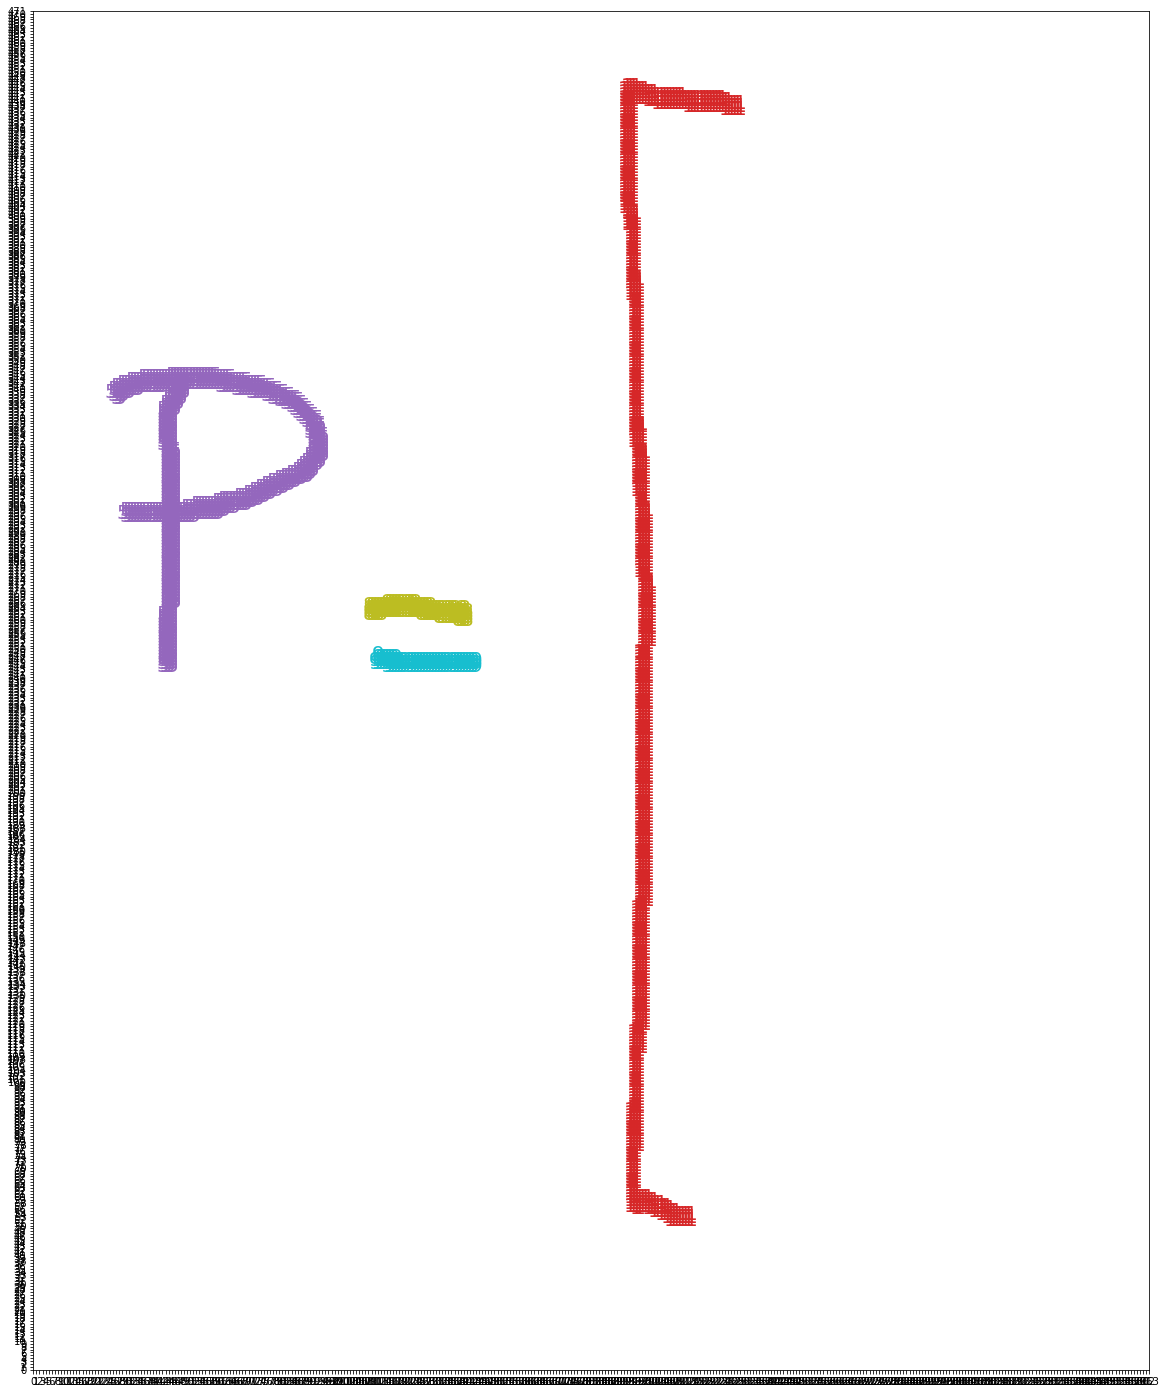

In [34]:
##unnecessary but "pretty"
plot_numbered_image(label_arr,matname)

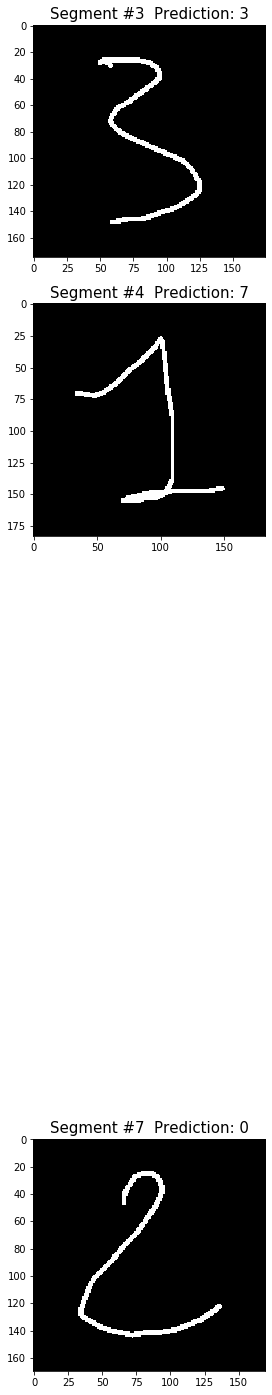

In [31]:
newdir = 'tempimgs/'
fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
for seg,ax in list(zip(segments,axes.flatten())):
    crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=fitted_clf,direc=newdir)
fig.savefig(matname+'_predictions.png')
!rm $newdir*

In [ ]:
## THIS IS TRASH
# newdir = 'tempimgs/'
# fig,axes = plt.subplots(len(segments),1,figsize=(5,len(segments)*5))
# for seg,ax in list(zip(segments,axes.flatten())):
#     crop_image(seg,label_arr,binary_arr,ax=ax,plot=True,model=hasy_clf,direc=newdir)
# fig.savefig(matname+'_predictions__HASY.png')
# !rm $newdir*

In [ ]:
# fig,axes = plt.subplots(1,4,figsize=(20,5))
# for img,ax in list(zip(labeled_foursomes[77],axes.flatten())):
#     ax.imshow(img[0])
#     ax.set_title('Label: '+str(img[1]),fontsize=30)
#     ax.set_xticks([])
#     ax.set_yticks([])
# plt.tight_layout();

In [ ]:
fig,axes = plt.subplots(15,1,figsize=(20,70))
for img,ax in list(zip(labeled_4some[:15],axes.flatten())):
    ax.imshow(img[0])
    ax.set_title('Labels: '+str(img[1]),fontsize=30)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout();

In [ ]:
!rm generated_imageset/*

In [ ]:
255-np.array(labeled_foursomes[0][0])

In [ ]:
filename = partial_set[0][0]
filename

In [ ]:
yhat, acc, fitted_clf = get_clf(X_tr, X_ts, y_tr, y_ts)

In [ ]:
partial_set = make_stuff()

In [ ]:
partial_set[0]

In [ ]:
process_image(partial_set[0][0],'TESTINGYO/',fitted_clf)
!rm tempimgs/*

In [ ]:
results = pd.DataFrame(partial_set)
results.columns = ['image','truth']
results

In [ ]:
def getscore(x):
    return x['truth']==x['predict']    

In [ ]:
predictions=np.array(predictions)
results['predict'] = predictions

In [ ]:
def setdiff(x):
    return x['truth']==x['predict']
results['correct']=results.apply(setdiff,axis=1)
results

In [ ]:
results.to_csv('Pass3_results.csv')

In [ ]:
results[0]['predict']

In [ ]:
def setdiff(x):
    return x['truth']==x['predict']

In [ ]:
predictions=np.array(predictions)
results['predict'] = predictions

In [ ]:
predictions = []
for index,image in enumerate(results['image']):
    matname = 'Pass2/output__'+str(index)
    predictions.append(process_image(image,matname,fitted_clf))


In [46]:
pass3 = make_stuff()

In [493]:
results4 = main(pass3)

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 5
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 6
number of segments 6
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 6
number of segments 5
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 6
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 6
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 6
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 6
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 6
number of segments 4
number of segments 7
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 7
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag


number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 7
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 5
number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 7
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 7
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 6
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 7
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4


Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int64 to uint8. Range [0, 1]. Convert imag

number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 4
number of segments 5
number of segments 4
number of segments 4
number of segments 4


,image,truth,predict,correct
0,generated_imageset/merge_4_0____1367.png,"[1, 3, 6, 7]","[1, 3, 4, 2]","[True, True, False, False]"
1,generated_imageset/merge_4_1____9999.png,"[9, 9, 9, 9]","[9, 7, 9, 9]","[True, False, True, True]"
2,generated_imageset/merge_4_2____1850.png,"[1, 8, 5, 0]","[1, 8, 5, 0]","[True, True, True, True]"
3,generated_imageset/merge_4_3____2833.png,"[2, 8, 3, 3]","[2, 8, 5, 3]","[True, True, False, True]"
4,generated_imageset/merge_4_4____3028.png,"[3, 0, 2, 8]","[3, 0, 4, 5]","[True, True, False, False]"
...,...,...,...,...
2495,generated_imageset/merge_4_2495____9970.png,"[9, 9, 7, 0]","[4, 9, 3, 0]","[False, True, False, True]"
2496,generated_imageset/merge_4_2496____6551.png,"[6, 5, 5, 1]","[8, 5, None, 4, 1]",False
2497,generated_imageset/merge_4_2497____1407.png,"[1, 4, 0, 7]","[1, 3, 0, 3]","[True, False, True, False]"
2498,generated_imageset/merge_4_2498____1274.png,"[1, 2, 7, 4]","[1, 0, 3, 3]","[True, False, False, False]"


## PASS #4 (n=2500)

In [535]:
results4 = results4[['truth', 'predict', 'correct']]

In [536]:
results4

,truth,predict,correct
0,"[1, 3, 6, 7]","[1, 3, 4, 2]","[True, True, False, False]"
1,"[9, 9, 9, 9]","[9, 7, 9, 9]","[True, False, True, True]"
2,"[1, 8, 5, 0]","[1, 8, 5, 0]","[True, True, True, True]"
3,"[2, 8, 3, 3]","[2, 8, 5, 3]","[True, True, False, True]"
4,"[3, 0, 2, 8]","[3, 0, 4, 5]","[True, True, False, False]"
...,...,...,...
2495,"[9, 9, 7, 0]","[4, 9, 3, 0]","[False, True, False, True]"
2496,"[6, 5, 5, 1]","[8, 5, None, 4, 1]",False
2497,"[1, 4, 0, 7]","[1, 3, 0, 3]","[True, False, True, False]"
2498,"[1, 2, 7, 4]","[1, 0, 3, 3]","[True, False, False, False]"


In [500]:
results4['string']= results4.correct.astype(str)

In [502]:
results4['string']= results4.correct.astype(str)
def getscore(x):
    if x['string']=='False':
        return -10
    else:
        return x['string'].count('True')/4
results4['score'] = results4.apply(getscore,axis=1)    
mismatched = results4[results4.score<0]
mainset = results4[results4.score>=0]
mismatched.drop('string',axis=1,inplace=True)
mainset.drop('string',axis=1,inplace=True)

In [506]:
results4['score'] = results4.apply(getscore,axis=1)

In [507]:
results4

,truth,predict,correct,string,score
0,"[1, 3, 6, 7]","[1, 3, 4, 2]","[True, True, False, False]",[ True True False False],0.50
1,"[9, 9, 9, 9]","[9, 7, 9, 9]","[True, False, True, True]",[ True False True True],0.75
2,"[1, 8, 5, 0]","[1, 8, 5, 0]","[True, True, True, True]",[ True True True True],1.00
3,"[2, 8, 3, 3]","[2, 8, 5, 3]","[True, True, False, True]",[ True True False True],0.75
4,"[3, 0, 2, 8]","[3, 0, 4, 5]","[True, True, False, False]",[ True True False False],0.50
...,...,...,...,...,...
2495,"[9, 9, 7, 0]","[4, 9, 3, 0]","[False, True, False, True]",[False True False True],0.50
2496,"[6, 5, 5, 1]","[8, 5, None, 4, 1]",False,False,-10.00
2497,"[1, 4, 0, 7]","[1, 3, 0, 3]","[True, False, True, False]",[ True False True False],0.50
2498,"[1, 2, 7, 4]","[1, 0, 3, 3]","[True, False, False, False]",[ True False False False],0.25


In [510]:
mismatched = results4[results4.score<0]

In [511]:
mainset = results4[results4.score>=0]

In [513]:
mainset.drop('string',axis=1,inplace=True)

In [514]:
mainset

,truth,predict,correct,score
0,"[1, 3, 6, 7]","[1, 3, 4, 2]","[True, True, False, False]",0.50
1,"[9, 9, 9, 9]","[9, 7, 9, 9]","[True, False, True, True]",0.75
2,"[1, 8, 5, 0]","[1, 8, 5, 0]","[True, True, True, True]",1.00
3,"[2, 8, 3, 3]","[2, 8, 5, 3]","[True, True, False, True]",0.75
4,"[3, 0, 2, 8]","[3, 0, 4, 5]","[True, True, False, False]",0.50
...,...,...,...,...
2494,"[3, 1, 9, 9]","[8, 1, 4, 2]","[False, True, False, False]",0.25
2495,"[9, 9, 7, 0]","[4, 9, 3, 0]","[False, True, False, True]",0.50
2497,"[1, 4, 0, 7]","[1, 3, 0, 3]","[True, False, True, False]",0.50
2498,"[1, 2, 7, 4]","[1, 0, 3, 3]","[True, False, False, False]",0.25


In [515]:
mainset.describe()

,score
count,2365.000000
mean,0.558140
std,0.244768
min,0.000000
25%,0.500000
50%,0.500000
75%,0.750000
max,1.000000


## FINAL RESULTS (n=17500)

In [517]:
fullset=make_stuff()

In [520]:
fullset_df = pd.DataFrame(np.array(fullset))

In [521]:
fullset_df.to_csv('fullset.csv')

In [523]:
len(fullset)

17500

In [540]:
# results_final = main(fullset)

In [541]:
results_final = results_final[['truth', 'predict', 'correct']]

In [542]:
results_final

,truth,predict,correct
0,"[4, 2, 6, 7]","[0, 2, None, None, 7]",False
1,"[3, 6, 0, 7]","[3, 3, 0, 5]","[True, False, True, False]"
2,"[8, 7, 2, 3]","[5, 2, 2, 3]","[False, False, True, True]"
3,"[8, 3, 6, 5]","[8, 3, 3, 4]","[True, True, False, False]"
4,"[2, 4, 4, 9]","[2, 4, 4, 8]","[True, True, True, False]"
...,...,...,...
17495,"[4, 1, 3, 7]","[4, 1, 3, 2]","[True, True, True, False]"
17496,"[1, 1, 3, 5]","[1, 1, 3, 3]","[True, True, True, False]"
17497,"[1, 5, 1, 2]","[1, 5, 1, 2]","[True, True, True, True]"
17498,"[1, 1, 2, 3]","[1, 1, 2, 3]","[True, True, True, True]"


In [543]:
results_final['string']= results_final.correct.astype(str)

In [544]:
results_final['score'] = results_final.apply(getscore,axis=1)

In [545]:
results_final

,truth,predict,correct,string,score
0,"[4, 2, 6, 7]","[0, 2, None, None, 7]",False,False,-10.00
1,"[3, 6, 0, 7]","[3, 3, 0, 5]","[True, False, True, False]",[ True False True False],0.50
2,"[8, 7, 2, 3]","[5, 2, 2, 3]","[False, False, True, True]",[False False True True],0.50
3,"[8, 3, 6, 5]","[8, 3, 3, 4]","[True, True, False, False]",[ True True False False],0.50
4,"[2, 4, 4, 9]","[2, 4, 4, 8]","[True, True, True, False]",[ True True True False],0.75
...,...,...,...,...,...
17495,"[4, 1, 3, 7]","[4, 1, 3, 2]","[True, True, True, False]",[ True True True False],0.75
17496,"[1, 1, 3, 5]","[1, 1, 3, 3]","[True, True, True, False]",[ True True True False],0.75
17497,"[1, 5, 1, 2]","[1, 5, 1, 2]","[True, True, True, True]",[ True True True True],1.00
17498,"[1, 1, 2, 3]","[1, 1, 2, 3]","[True, True, True, True]",[ True True True True],1.00


In [551]:
mismatched_final = results_final[results_final.score<0]
len(mismatched_final)

2292

In [547]:
mainset_final = results_final[results_final.score>=0]

In [548]:
mainset_final.drop('string',axis=1,inplace=True)

In [549]:
mainset_final

,truth,predict,correct,score
1,"[3, 6, 0, 7]","[3, 3, 0, 5]","[True, False, True, False]",0.50
2,"[8, 7, 2, 3]","[5, 2, 2, 3]","[False, False, True, True]",0.50
3,"[8, 3, 6, 5]","[8, 3, 3, 4]","[True, True, False, False]",0.50
4,"[2, 4, 4, 9]","[2, 4, 4, 8]","[True, True, True, False]",0.75
5,"[3, 3, 7, 7]","[3, 3, 7, 7]","[True, True, True, True]",1.00
...,...,...,...,...
17495,"[4, 1, 3, 7]","[4, 1, 3, 2]","[True, True, True, False]",0.75
17496,"[1, 1, 3, 5]","[1, 1, 3, 3]","[True, True, True, False]",0.75
17497,"[1, 5, 1, 2]","[1, 5, 1, 2]","[True, True, True, True]",1.00
17498,"[1, 1, 2, 3]","[1, 1, 2, 3]","[True, True, True, True]",1.00


In [550]:
mainset_final.describe()

,score
count,15208.000000
mean,0.580468
std,0.246177
min,0.000000
25%,0.500000
50%,0.500000
75%,0.750000
max,1.000000


In [554]:
fullset_df.columns = ['image','truth']

# SVM

In [6]:
from sklearn import svm
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [4]:
X_tr_flat = [x.flatten() for x in X_tr][:9000]
X_ts_flat = [x.flatten() for x in X_ts]


In [7]:
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_tr_flat)
y_tr_scaled = y_tr[:9000]

In [9]:
svm_model = svm.SVC()
svm_model.fit(X_tr_scaled,y_tr_scaled)

/home/nina/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [15]:
filename = 'generated_imageset/merge_4_568____8427.png'
dirname = 'SVC/output__'

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


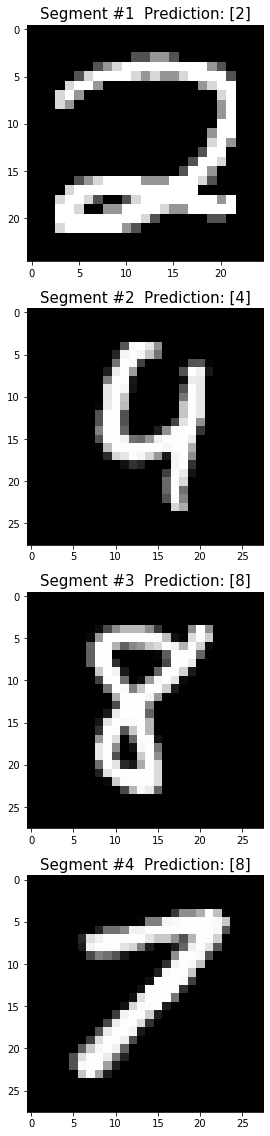

In [18]:
svmpred = process_image(filename,dirname,svm_model,plot=True,svc=True).flatten()

In [19]:
svmpred

array([8, 4, 2, 8], dtype=uint8)

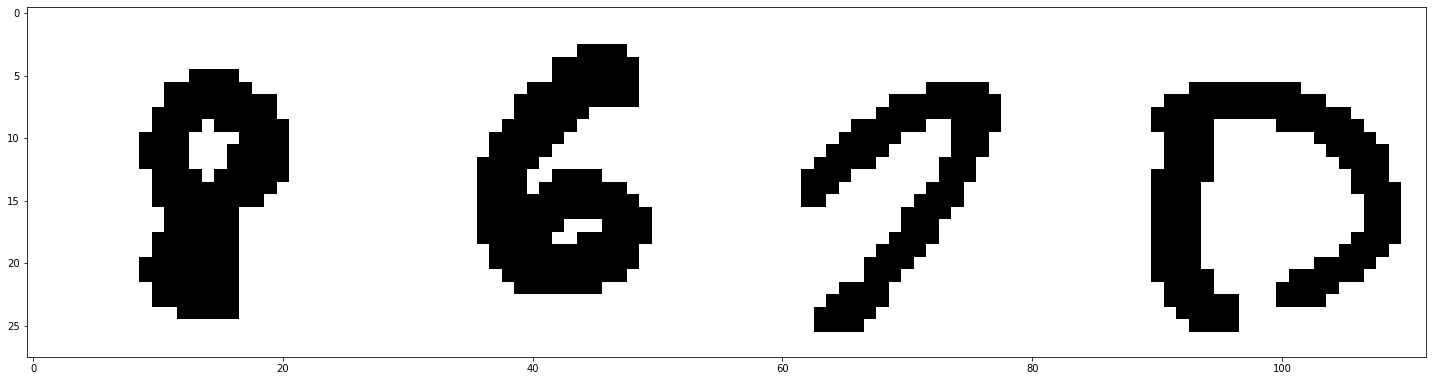

Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


number of segments 4


In [18]:
binary,labels,segments,image = label_segments(filename,dirname)

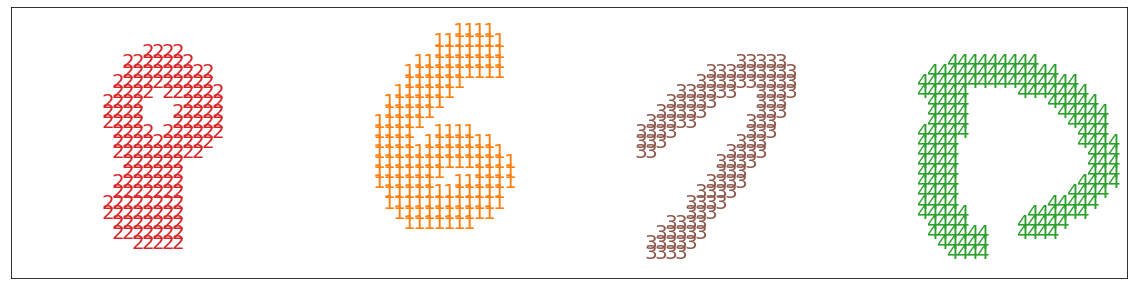

In [17]:
plot_numbered_image(labels,dirname+'stuff')

In [ ]:
fig,ax = plt.subplots(1)
img, pred, digit = crop_image(2,labels,image,ax=ax,plot=True,model=svm_model,direc='tempimgs/')

In [1]:
svm_model.predict(scaler.fit_transform(img).flatten().reshape(1,-1))

NameError: name 'svm_model' is not defined

In [ ]:
SVC_results = main(pass3,svc=True,fitted_clf=svm_model)